# Time Series Forecasting with ARIMA

# collecting Google stock price data using the Yahoo Finance API

In [2]:
# installing the yahoofinance

In [3]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing the libraries and setting the date to today
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [5]:
# setting d1 and d2 as start date and end date(today) for collecting the data
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [6]:
df = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
2023-05-31  123.699997  124.900002  123.099998  123.370003  123.370003   
2023-06-01  123.500000  125.040001  123.300003  124.370003  124.370003   
2023-06-02  124.489998  126.745003  124.349998  125.230003  125.230003   
2023-06-05  124.610001  127.989998  124.379997  126.629997  126.629997   

              Volume  
Date                  
2023-05-30  27230700  
2023-05-31  41548800  
2023-06-01  25017700  
2023-06-02  19362400  
2023-06-05  22672500  


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500
...,...,...,...,...,...,...
2024-05-16,174.600006,176.339996,174.050003,175.429993,175.429993,17247300
2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100


In [8]:
# making the index column as date column and reset the index
df["Date"] = df.index
df = df[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
1 2023-05-31  123.699997  124.900002  123.099998  123.370003  123.370003   
2 2023-06-01  123.500000  125.040001  123.300003  124.370003  124.370003   
3 2023-06-02  124.489998  126.745003  124.349998  125.230003  125.230003   
4 2023-06-05  124.610001  127.989998  124.379997  126.629997  126.629997   

     Volume  
0  27230700  
1  41548800  
2  25017700  
3  19362400  
4  22672500  


In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
1,2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2,2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
3,2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
4,2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500
...,...,...,...,...,...,...,...
243,2024-05-16,174.600006,176.339996,174.050003,175.429993,175.429993,17247300
244,2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
245,2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100
246,2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000


# preprocess and filtering the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       248 non-null    datetime64[ns]
 1   Open       248 non-null    float64       
 2   High       248 non-null    float64       
 3   Low        248 non-null    float64       
 4   Close      248 non-null    float64       
 5   Adj Close  248 non-null    float64       
 6   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.describe

<bound method NDFrame.describe of           Date        Open        High         Low       Close   Adj Close  \
0   2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
1   2023-05-31  123.699997  124.900002  123.099998  123.370003  123.370003   
2   2023-06-01  123.500000  125.040001  123.300003  124.370003  124.370003   
3   2023-06-02  124.489998  126.745003  124.349998  125.230003  125.230003   
4   2023-06-05  124.610001  127.989998  124.379997  126.629997  126.629997   
..         ...         ...         ...         ...         ...         ...   
243 2024-05-16  174.600006  176.339996  174.050003  175.429993  175.429993   
244 2024-05-17  175.550003  177.494995  174.979996  177.289993  177.289993   
245 2024-05-20  177.309998  179.949997  177.225006  178.460007  178.460007   
246 2024-05-21  178.399994  179.820007  177.309998  179.539993  179.539993   
247 2024-05-22  178.399994  178.852005  176.779999  178.000000  178.000000   

       Volume  
0    27230700

In [14]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.873410,0.873630,0.872951,0.873277,0.873277,-0.078603
Open,0.873410,1.000000,0.997028,0.996713,0.992549,0.992549,-0.148528
High,0.873630,0.997028,1.000000,0.997380,0.996625,0.996625,-0.146523
Low,0.872951,0.996713,0.997380,1.000000,0.997361,0.997361,-0.175905
Close,0.873277,0.992549,0.996625,0.997361,1.000000,1.000000,-0.173521
Adj Close,0.873277,0.992549,0.996625,0.997361,1.000000,1.000000,-0.173521
Volume,-0.078603,-0.148528,-0.146523,-0.175905,-0.173521,-0.173521,1.000000


Text(0.5, 1.0, 'THE HEATMAP OF GOOGLE STOCK MARKET')

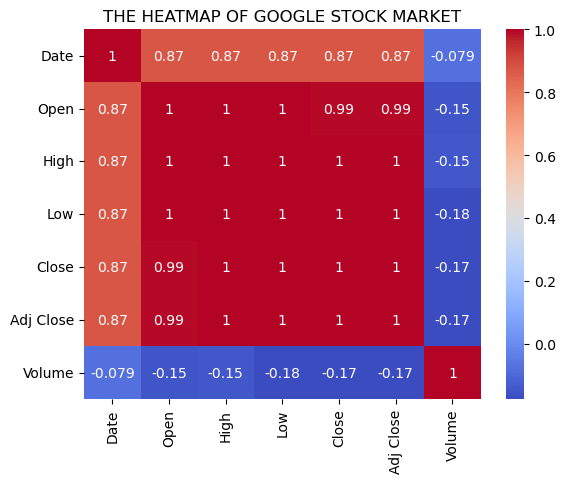

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('THE HEATMAP OF GOOGLE STOCK MARKET')

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

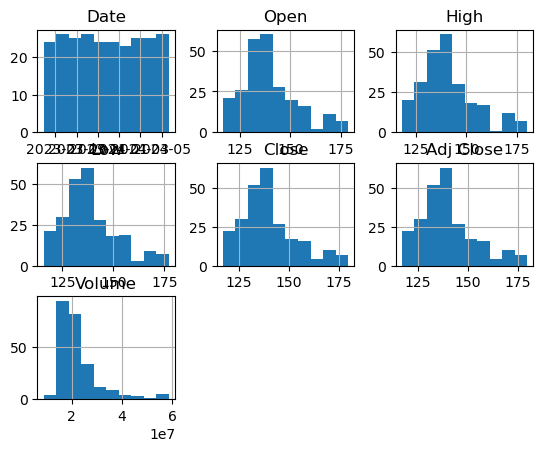

In [17]:
df.hist()

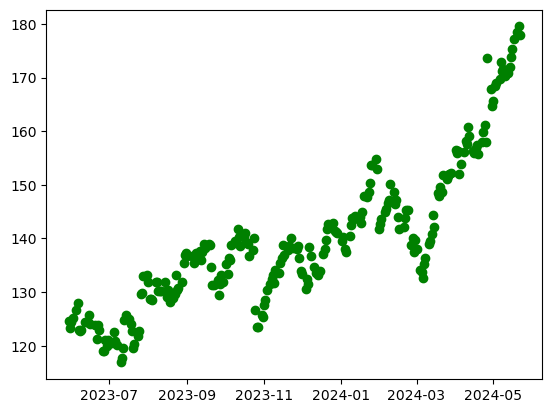

In [18]:
plt.scatter(df['Date'],df['Close'],color='green')

In [19]:
# WE ONLY NEED DATE AND CLOSING PRICE FOR THE TIME SERIES FORECAST 
df = df[["Date", "Close"]]
print(df.head())

        Date       Close
0 2023-05-30  124.639999
1 2023-05-31  123.370003
2 2023-06-01  124.370003
3 2023-06-02  125.230003
4 2023-06-05  126.629997


In [20]:
df

,Date,Close
0,2023-05-30,124.639999
1,2023-05-31,123.370003
2,2023-06-01,124.370003
3,2023-06-02,125.230003
4,2023-06-05,126.629997
...,...,...
243,2024-05-16,175.429993
244,2024-05-17,177.289993
245,2024-05-20,178.460007
246,2024-05-21,179.539993


C:\Users\dell\AppData\Local\Temp\ipykernel_3576\2159646613.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


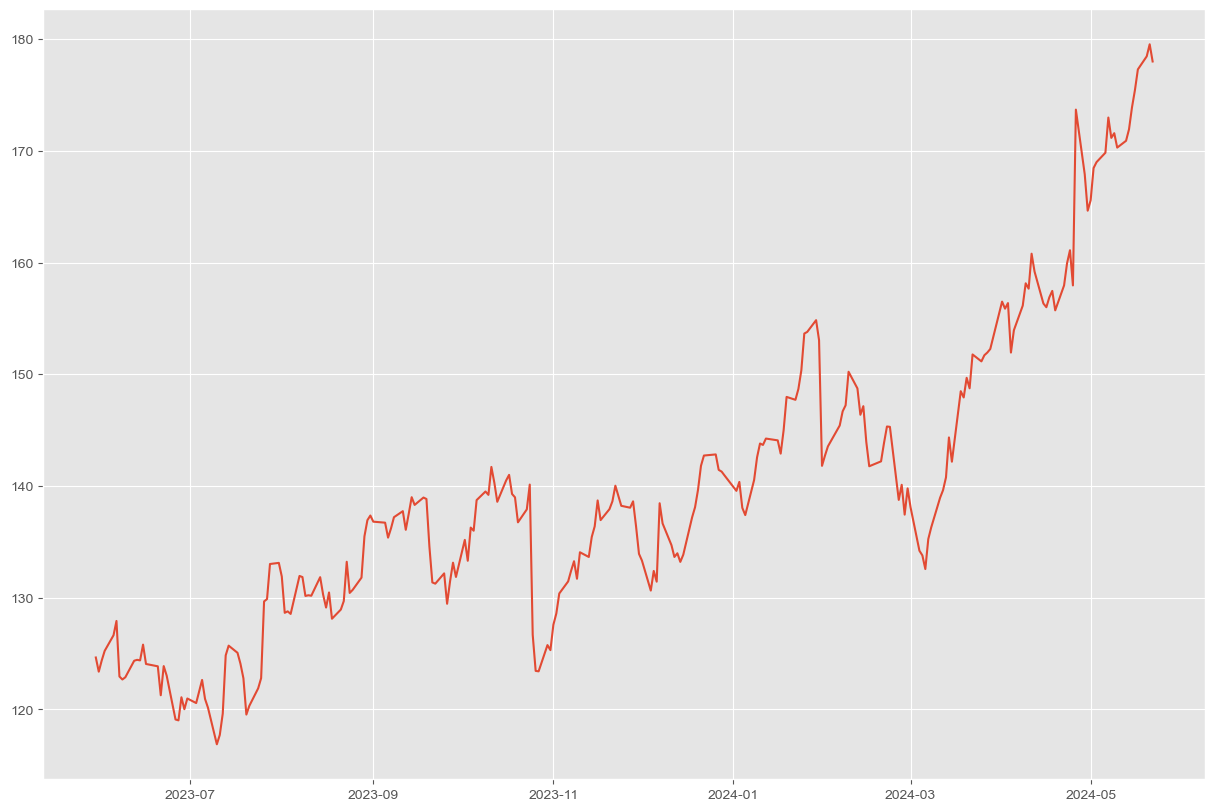

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Close"])
plt.style.use('seaborn-darkgrid')

# Using ARIMA for Time Series Forecasting

<Figure size 640x480 with 0 Axes>

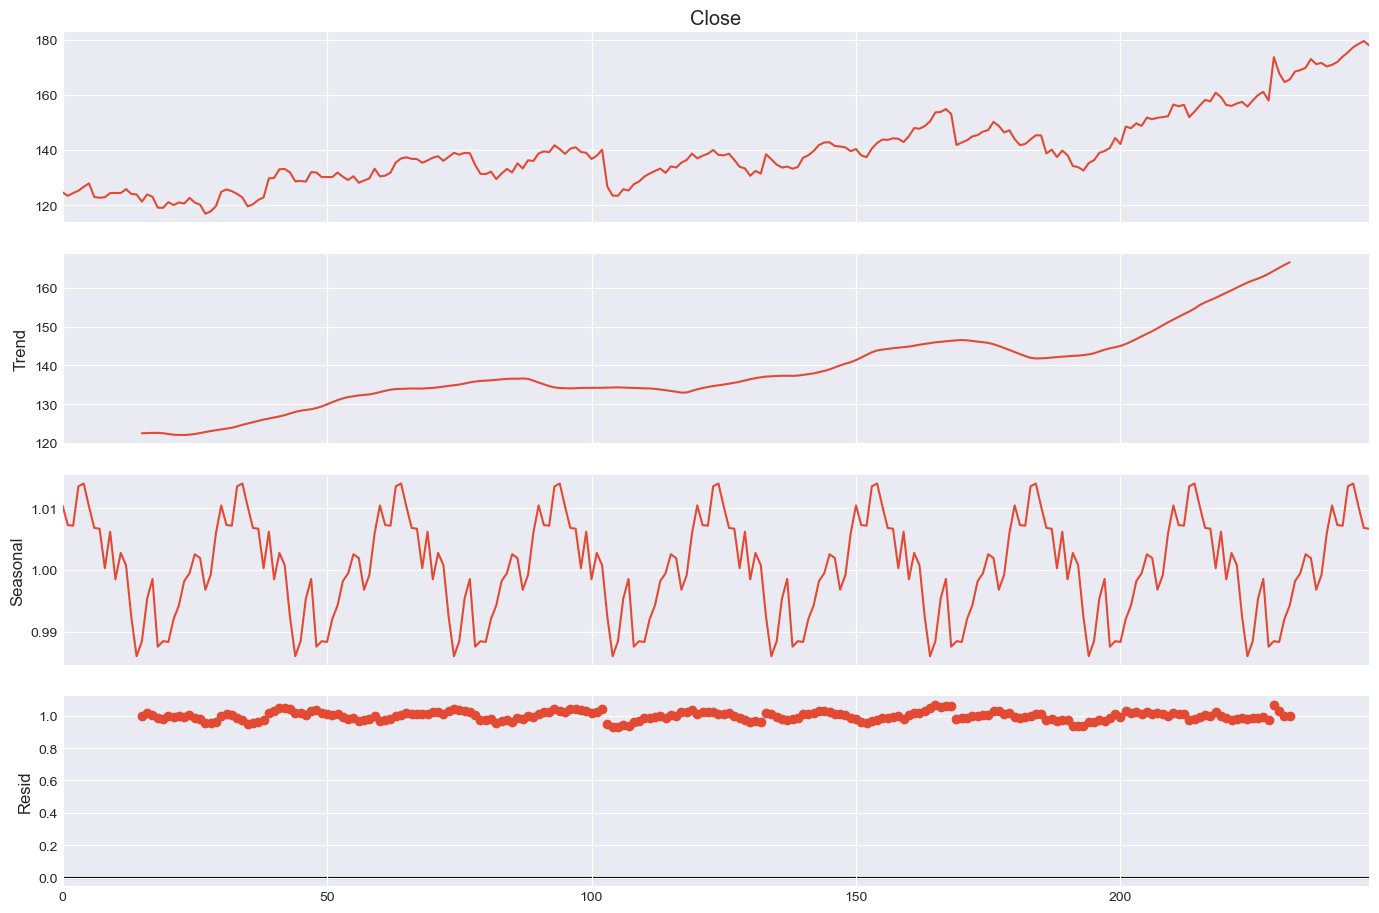

In [29]:
#check whether our dataset is stationary or seasonal properly
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period =30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [30]:
#So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Text(0.5, 1.0, 'Autocorrelation')

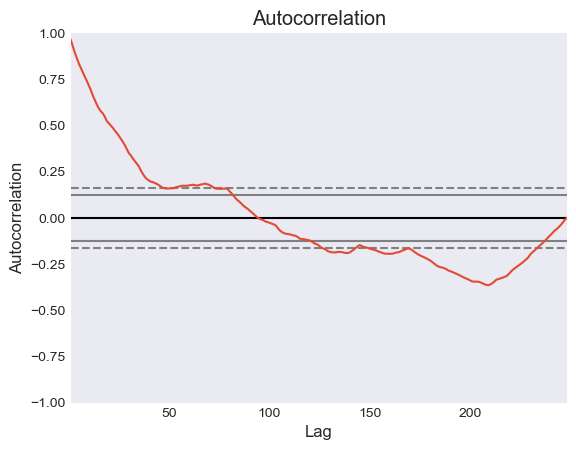

In [33]:
# the value of p:

pd.plotting.autocorrelation_plot(df["Close"])
plt.title('Autocorrelation')

the value of p is 15.

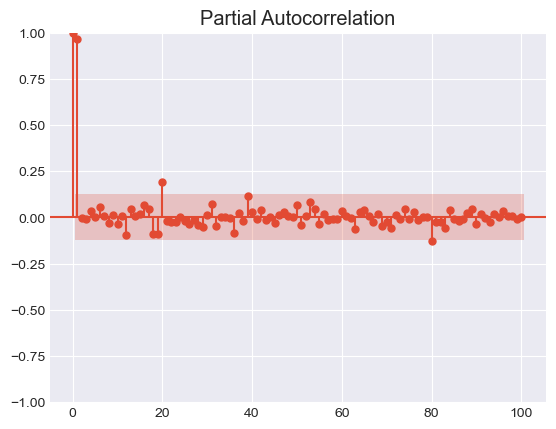

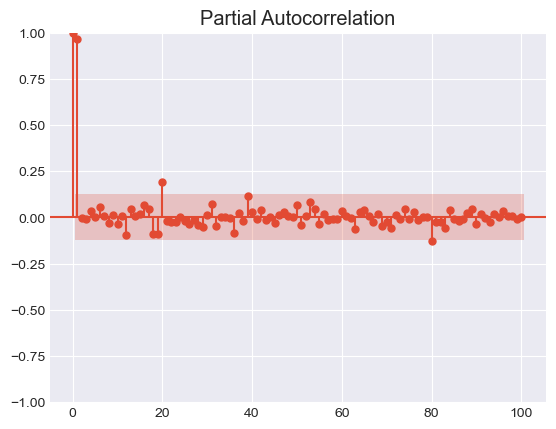

In [34]:
# the value of q (moving average):
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

two points are far away from all the points.Hence the value of q is 2.

In [35]:
p, d, q = 5, 1, 2

In [36]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  248
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -562.987
Date:                            Thu, 23 May 2024   AIC                           1155.974
Time:                                    13:47:44   BIC                           1207.868
Sample:                                         0   HQIC                          1176.896
                                            - 248                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1174      0.080     -1.461      0.144      -0.275       0.040
ar.L2         -0.9580      0.094   

# predict the future stock prices using the SARIMA model for the next 30 days:



In [38]:
predictions = model.predict(len(df), len(df)+30)
print(predictions)

248    177.935724
249    179.153257
250    178.643443
251    179.123741
252    178.549262
253    179.657360
254    179.000848
255    179.128342
256    180.655283
257    181.501091
258    180.185907
259    180.015168
260    180.259248
261    181.446758
262    180.775873
263    180.988801
264    181.133064
265    179.046185
266    179.959860
267    180.932789
268    182.181700
269    182.364172
270    182.220292
271    181.870567
272    181.361216
273    182.750096
274    182.298708
275    183.470961
276    183.178662
277    182.721010
278    182.944209
Name: predicted_mean, dtype: float64


<Axes: >

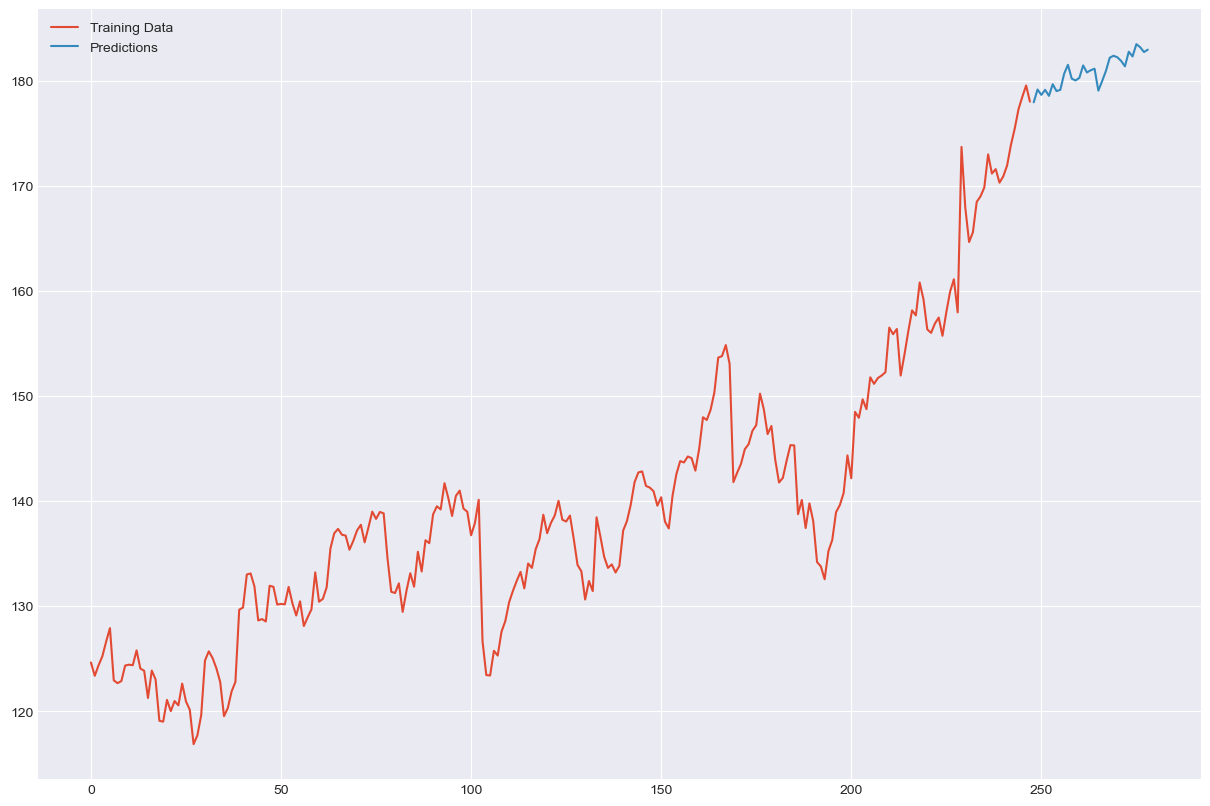

In [39]:
df["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

# summary

# Google Stock Price Prediction Using SARIMA

## Introduction
The plot above illustrates the historical and forecasted Google stock prices. The red line represents the historical stock prices, used as training data for the SARIMA (Seasonal Autoregressive Integrated Moving Average) model. The blue line denotes the predicted stock prices for the next 30 days.

## Historical Data
- **Training Data (Red Line):**
  - The historical data spans several months, capturing the stock price fluctuations of Google.
  - The stock prices exhibit a general upward trend with noticeable seasonal patterns and volatility.
  - Key observations include periods of rapid growth, corrections, and smaller fluctuations that might be attributed to market conditions, earnings reports, and other macroeconomic factors.

## Predictions
- **Predictions (Blue Line):**
  - The forecasted period covers the next 30 days, providing a short-term outlook for the stock price.
  - The SARIMA model captures the seasonal trends and volatility observed in the historical data, projecting them into the future.
  - The predicted stock prices continue the upward trend seen in the historical data, indicating a bullish outlook for Google's stock over the next month.
  - The predictions show slight fluctuations, reflecting the inherent volatility in stock prices but maintaining a general upward trajectory.

## SARIMA Model Details
- **Model Choice:** The SARIMA model is chosen for its ability to handle seasonal data, integrating autoregressive (AR), differencing (I), and moving average (MA) components, along with a seasonal component.
- **Parameters:**
  - **Seasonality Period:** The model is tuned to a seasonality period of 30 days, capturing monthly patterns in the stock price data.
  - **Multiplicative Model:** A multiplicative approach is used, appropriate for data where seasonal variations increase with the level of the time series.

## Conclusion
The graph provides a clear visual representation of the Google stock price's past performance and its expected movement over the next 30 days. Based on the SARIMA model's predictions, investors and stakeholders can anticipate a continued rise in Google's stock price with some expected volatility. This projection, however, should be considered along with other market analyses and indicators to make well-informed investment decisions.

## Final Remarks
- **Model Limitations:** While the SARIMA model offers a robust prediction based on historical trends, it's important to acknowledge that unforeseen market events, economic changes, or company-specific news can impact future stock prices beyond the model's scope.
- **Further Analysis:** For a comprehensive investment strategy, combining SARIMA predictions with other forecasting models and market analysis tools is recommended.


BY MAUZUM SHAMIL